In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o ficheiro CSV
df = pd.read_csv("AIRPOL_data.csv", sep=';')

#Remover colunas desnecessárias
df = df.iloc[:, :8]

# Corrigir vírgulas em números europeus (por pontos)
df['Affected_Population'] = df['Affected_Population'].str.replace(",", ".").astype(float)
df['Populated_Area[km2]'] = df['Populated_Area[km2]'].str.replace(",", ".").astype(float)
df['Air_Pollution_Average[ug/m3]'] = df['Air_Pollution_Average[ug/m3]'].str.replace(",", ".").astype(float)
df['Value'] = df['Value'].str.replace(",", ".").astype(float)

# Verificar as dimensões do dataset
print("Dimensão do dataset:", df.shape)

# Mostrar um sumário estatístico
print(df.describe(include='all'))

# Ver as primeiras linhas
df.head()

# Verificar dados em falta
print(df.isnull().sum())

# Remover ou imputar valores nulos
df = df.dropna()

# Remover duplicados
df = df.drop_duplicates()

# Confirmar tipos
print(df.dtypes)

df.head()

# Listas de países por região
western = ['Austria', 'Belgium', 'France', 'Germany', 'Netherlands', 'Switzerland']
eastern = ['Poland', 'Czechia', 'Hungary']
southern = ['Greece', 'Spain', 'Italy', 'Portugal']
northern = ['Sweden', 'Denmark', 'Finland']

# Função para mapear
def get_region(country):
    if country in western:
        return 'Western Europe'
    elif country in eastern:
        return 'Eastern Europe'
    elif country in southern:
        return 'Southern Europe'
    elif country in northern:
        return 'Northern Europe'
    else:
        return 'Other'

# Aplicar ao dataset
df['Region'] = df['Country'].apply(get_region)

# Verificar agrupamento
df['Region'].value_counts()

df.head()

Dimensão do dataset: (49140, 8)
        Country NUTS_Code Air_Pollutant Outcome  Affected_Population  \
count     49140     49140         49140   49140         4.914000e+04   
unique       42      1755             3       6                  NaN   
top     Germany        BA         PM2.5  Asthma                  NaN   
freq      13224       116         29682   10254                  NaN   
mean        NaN       NaN           NaN     NaN         1.023692e+06   
std         NaN       NaN           NaN     NaN         9.085726e+06   
min         NaN       NaN           NaN     NaN         2.674000e+03   
25%         NaN       NaN           NaN     NaN         1.069040e+05   
50%         NaN       NaN           NaN     NaN         2.388280e+05   
75%         NaN       NaN           NaN     NaN         5.988800e+05   
max         NaN       NaN           NaN     NaN         4.680626e+08   

        Populated_Area[km2]  Air_Pollution_Average[ug/m3]          Value  
count          4.914000e+04 

,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value,Region
0,Albania,AL,NO2,Asthma,2337443.0,11299.0,5.5,103.0,Other
1,Albania,AL,PM2.5,Asthma,456076.0,11299.0,11.3,231.0,Other
2,Albania,AL0,NO2,Asthma,2337443.0,11299.0,5.5,103.0,Other
3,Albania,AL0,PM2.5,Asthma,456076.0,11299.0,11.3,231.0,Other
4,Albania,AL03,PM2.5,Asthma,149508.0,4041.5,11.3,69.0,Other


In [7]:
#4.3.1.

# Assumindo que df já foi carregado e pré-processado

# Definir doenças respiratórias
respiratory_diseases = ['Asthma', 'Chronic obstructive pulmonary disease']

# Criar novo atributo binário: 1 se for respiratória, 0 caso contrário
df['RespDisease'] = df['Outcome'].apply(lambda x: 1 if x in respiratory_diseases else 0)

# Verificar distribuição
print(df['RespDisease'].value_counts())

df.head()

RespDisease
0    29317
1    16223
Name: count, dtype: int64


,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value,Region,RespDisease
0,Albania,AL,NO2,Asthma,2337443.0,11299.0,5.5,103.0,Other,1
1,Albania,AL,PM2.5,Asthma,456076.0,11299.0,11.3,231.0,Other,1
2,Albania,AL0,NO2,Asthma,2337443.0,11299.0,5.5,103.0,Other,1
3,Albania,AL0,PM2.5,Asthma,456076.0,11299.0,11.3,231.0,Other,1
4,Albania,AL03,PM2.5,Asthma,149508.0,4041.5,11.3,69.0,Other,1


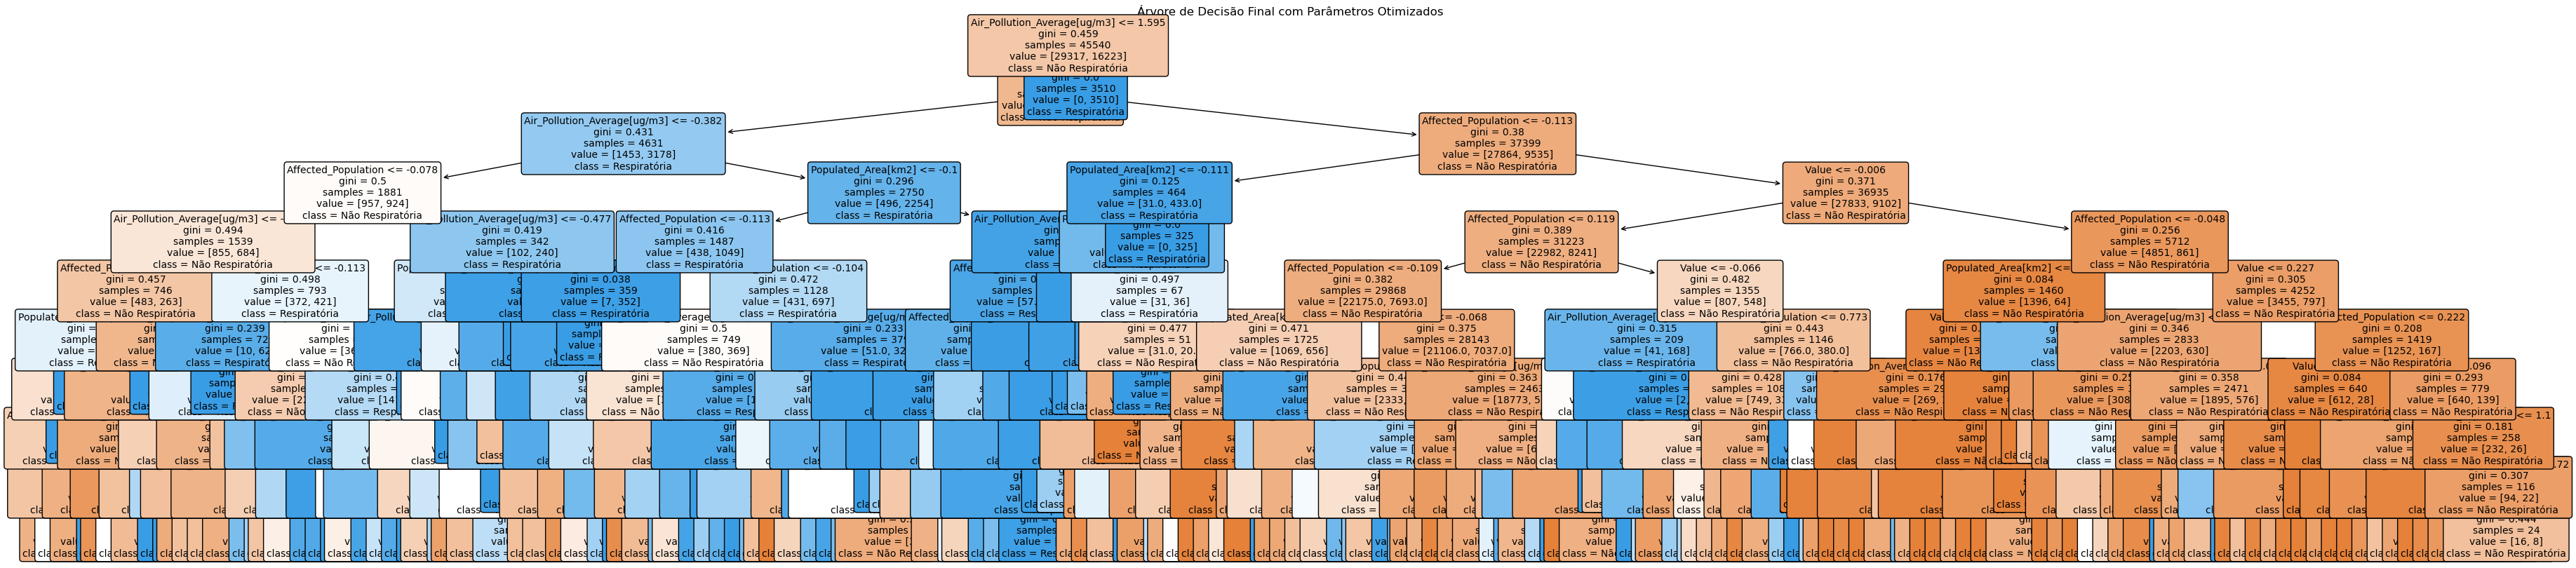


📌 Melhor combinação de hiperparâmetros:
max_depth: 10
min_samples_split: 2
min_samples_leaf: 3
Melhor F1-score médio (classe Respiratória): 0.6128

Relatório de Classificação:
                  precision    recall  f1-score   support

Não Respiratória       0.77      0.99      0.86     29317
    Respiratória       0.96      0.46      0.62     16223

        accuracy                           0.80     45540
       macro avg       0.87      0.72      0.74     45540
    weighted avg       0.84      0.80      0.78     45540



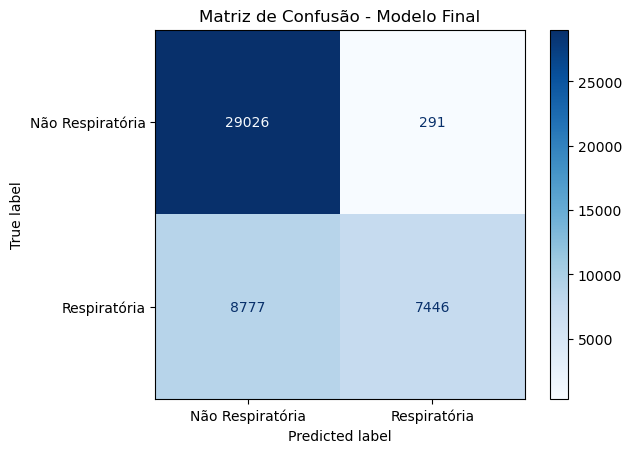


📊 Todas as combinações testadas (ordenadas por F1-score):
 max_depth  min_samples_split  min_samples_leaf  f1_score
        10                  5                 3  0.612843
        10                  4                 3  0.612843
        10                  3                 3  0.612843
        10                  2                 3  0.612843
        10                  5                 2  0.612479
        10                  5                 1  0.612471
        10                  2                 1  0.612468
        10                  3                 1  0.612388
        10                  4                 1  0.612271
        10                  4                 2  0.612261
        10                  3                 2  0.612261
        10                  2                 2  0.612261
         9                  3                 3  0.601451
         9                  2                 3  0.601451
         9                  4                 3  0.601451
         9   

In [9]:
#4.3.2. a)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- Dados ---
features = ['Air_Pollution_Average[ug/m3]', 'Affected_Population', 'Populated_Area[km2]', 'Value']
X = df[features]
y = df['RespDisease']

# --- Configuração do k-fold ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Espaço de pesquisa dos hiperparâmetros ---
best_f1 = 0
best_params = {}
best_model = None
all_results = []

for max_depth in range(2, 11):
    for min_samples_split in range(2, 6):
        for min_samples_leaf in range(1, 4):
            f1_scores = []

            for train_idx, test_idx in cv.split(X, y):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                # Normalizar
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                # Treinar modelo
                clf = DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                clf.fit(X_train_scaled, y_train)
                y_pred = clf.predict(X_test_scaled)

                # Calcular F1-score (classe positiva = 1)
                f1 = f1_score(y_test, y_pred, pos_label=1)
                f1_scores.append(f1)

            avg_f1 = np.mean(f1_scores)

            # Guardar resultados
            all_results.append({
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'f1_score': avg_f1
            })

            if avg_f1 > best_f1:
                best_f1 = avg_f1
                best_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }
                best_model = clf

# --- Modelo final com todos os dados ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
final_model = DecisionTreeClassifier(**best_params, random_state=42)
final_model.fit(X_scaled, y)

# --- Visualização da árvore final ---
plt.figure(figsize=(45, 10))
plot_tree(final_model,
          feature_names=features,
          class_names=['Não Respiratória', 'Respiratória'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árvore de Decisão Final com Parâmetros Otimizados")
plt.show()

# --- Avaliação com todos os dados ---
y_pred_final = final_model.predict(X_scaled)

print("\n📌 Melhor combinação de hiperparâmetros:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print(f"Melhor F1-score médio (classe Respiratória): {best_f1:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y, y_pred_final, target_names=['Não Respiratória', 'Respiratória']))

cm = confusion_matrix(y, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Respiratória', 'Respiratória'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Modelo Final")
plt.grid(False)
plt.show()

# --- Mostrar todas as combinações ordenadas por F1 ---
results_df = pd.DataFrame(all_results)
results_df_sorted = results_df.sort_values(by='f1_score', ascending=False)

print("\n📊 Todas as combinações testadas (ordenadas por F1-score):")
print(results_df_sorted.to_string(index=False))



Testing hidden_layer_sizes=(50,)
Fold 1: Accuracy = 0.7606
Fold 2: Accuracy = 0.7697
Fold 3: Accuracy = 0.7613
Fold 4: Accuracy = 0.7497
Fold 5: Accuracy = 0.7332
Fold 6: Accuracy = 0.7317
Fold 7: Accuracy = 0.7558
Fold 8: Accuracy = 0.7532
Fold 9: Accuracy = 0.7650
Fold 10: Accuracy = 0.7585
Average Accuracy for (50,): 0.7539

Testing hidden_layer_sizes=(100,)
Fold 1: Accuracy = 0.7589
Fold 2: Accuracy = 0.7721
Fold 3: Accuracy = 0.7657
Fold 4: Accuracy = 0.7657
Fold 5: Accuracy = 0.7521
Fold 6: Accuracy = 0.7659
Fold 7: Accuracy = 0.7611
Fold 8: Accuracy = 0.7598
Fold 9: Accuracy = 0.7639
Fold 10: Accuracy = 0.7642
Average Accuracy for (100,): 0.7629

Testing hidden_layer_sizes=(50, 50)
Fold 1: Accuracy = 0.7648
Fold 2: Accuracy = 0.7771
Fold 3: Accuracy = 0.7723
Fold 4: Accuracy = 0.7664
Fold 5: Accuracy = 0.7569
Fold 6: Accuracy = 0.7710
Fold 7: Accuracy = 0.7666
Fold 8: Accuracy = 0.7800
Fold 9: Accuracy = 0.7714
Fold 10: Accuracy = 0.7705
Average Accuracy for (50, 50): 0.7697

T

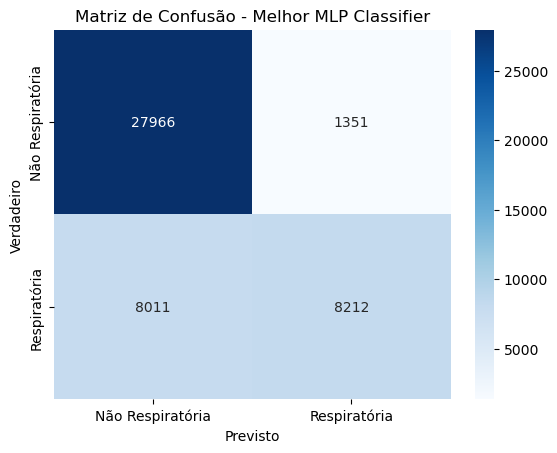

In [13]:
#4.3.2. b)

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# === FEATURES E ALVO ===
features = ['Air_Pollution_Average[ug/m3]', 'Affected_Population', 'Populated_Area[km2]', 'Value']
X = df[features]
y = df['RespDisease']

# === NORMALIZAÇÃO ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === DEFINIR FOLDS ===
k = 10
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# === OPÇÕES DE ARQUITETURA ===
hidden_layer_options = [
    (50,),
    (100,),
    (50, 50),
    (100, 50),
    (128, 64, 32)
]

# === ACOMPANHAMENTO DOS MELHORES RESULTADOS ===
best_config = None
best_accuracy = 0
all_results = {}

for layers in hidden_layer_options:
    acc_scores = []

    print(f"\nTesting hidden_layer_sizes={layers}")

    for fold, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y), start=1):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = MLPClassifier(
            hidden_layer_sizes=layers,
            activation='relu',
            alpha=0.001,
            random_state=42,
            early_stopping=True,
            max_iter=1000
        )

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        acc_scores.append(acc)

        print(f"Fold {fold}: Accuracy = {acc:.4f}")

    mean_acc = np.mean(acc_scores)
    all_results[layers] = mean_acc

    print(f"Average Accuracy for {layers}: {mean_acc:.4f}")

    if mean_acc > best_accuracy:
        best_accuracy = mean_acc
        best_config = layers

# === RESULTADO FINAL ===
print("\n=== Resultados Finais da Validação Cruzada ===")
for layers, acc in all_results.items():
    print(f"Config {layers}: Mean Accuracy = {acc:.4f}")

print(f"\nMelhor configuração: {best_config}")
print(f"Melhor Acurácia Média: {best_accuracy:.4f}")

# === AVALIAÇÃO FINAL COM MODELO TREINADO COMPLETO ===
final_model = MLPClassifier(
    hidden_layer_sizes=best_config,
    activation='relu',
    alpha=0.001,
    random_state=42,
    early_stopping=True,
    max_iter=1000
)
final_model.fit(X_scaled, y)
y_final_pred = final_model.predict(X_scaled)

# === MATRIZ DE CONFUSÃO E RELATÓRIO ===
cm = confusion_matrix(y, y_final_pred)
print("\nMatriz de Confusão:")
print(pd.DataFrame(cm,
                   index=['Actual_NãoResp', 'Actual_Resp'],
                   columns=['Pred_NãoResp', 'Pred_Resp']))

print("\nRelatório de Classificação:")
print(classification_report(y, y_final_pred, target_names=['Não Respiratória', 'Respiratória']))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Respiratória', 'Respiratória'],
            yticklabels=['Não Respiratória', 'Respiratória'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Melhor MLP Classifier')
plt.show()


In [31]:
#4.3.2. c)

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# === Dados ===
features = ['Air_Pollution_Average[ug/m3]', 'Affected_Population', 'Populated_Area[km2]', 'Value']
X = df[features]
y = df['RespDisease']

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validação cruzada
k = 10
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Kernels a testar
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
gammas = [0.1, 1]  # Apenas para kernels não-lineares

best_config = None
best_accuracy = 0
results = {}

total_runs = (len(kernels)-1)*len(gammas)*k + k  # linear só 1 gamma
current_run = 0

# Ciclo de otimização
for kernel in kernels:
    gamma_list = [None] if kernel == 'linear' else gammas

    for gamma in gamma_list:
        accuracies = []

        print(f"\nTesting kernel='{kernel}', gamma={gamma if gamma is not None else 'N/A'}")
        
        for i, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y)):
            current_run += 1
            print(f"Fold {i+1}/{k} | Progress: {(current_run / total_runs) * 100:.1f}%")
            
            X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            if kernel == 'linear':
                model = SVC(kernel=kernel, C=1, max_iter=10000)
            else:
                model = SVC(kernel=kernel, gamma=gamma, C=1, max_iter=10000)

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            accuracies.append(acc)

        mean_acc = np.mean(accuracies)
        results[(kernel, gamma)] = mean_acc
        print(f"Kernel: {kernel}, Gamma: {gamma if gamma is not None else 'N/A'} -> Mean Accuracy: {mean_acc:.4f}")

        if mean_acc > best_accuracy:
            best_accuracy = mean_acc
            best_config = (kernel, gamma)

# Resultado final
print("\n=== Melhor Configuração de Kernel ===")
best_kernel, best_gamma = best_config
print(f"Melhor Kernel: {best_kernel}, Gamma: {best_gamma if best_gamma is not None else 'N/A'}")
print(f"Acurácia Média: {best_accuracy:.4f}")

from sklearn.svm import SVC

# Construir o modelo final com os melhores parâmetros
if best_kernel in ['rbf', 'sigmoid']:
    best_svm = SVC(kernel=best_kernel, gamma=best_gamma, C=1, max_iter=10000)
else:
    best_svm = SVC(kernel=best_kernel, C=1, max_iter=10000)

# Treinar o modelo no conjunto completo (X_scaled, y)
best_svm.fit(X_scaled, y)




Testing kernel='linear', gamma=N/A
Fold 1/10 | Progress: 1.4%
Fold 2/10 | Progress: 2.9%
Fold 3/10 | Progress: 4.3%
Fold 4/10 | Progress: 5.7%
Fold 5/10 | Progress: 7.1%
Fold 6/10 | Progress: 8.6%
Fold 7/10 | Progress: 10.0%
Fold 8/10 | Progress: 11.4%
Fold 9/10 | Progress: 12.9%
Fold 10/10 | Progress: 14.3%
Kernel: linear, Gamma: N/A -> Mean Accuracy: 0.3851

Testing kernel='rbf', gamma=0.1
Fold 1/10 | Progress: 15.7%
Fold 2/10 | Progress: 17.1%
Fold 3/10 | Progress: 18.6%
Fold 4/10 | Progress: 20.0%
Fold 5/10 | Progress: 21.4%
Fold 6/10 | Progress: 22.9%
Fold 7/10 | Progress: 24.3%
Fold 8/10 | Progress: 25.7%
Fold 9/10 | Progress: 27.1%
Fold 10/10 | Progress: 28.6%
Kernel: rbf, Gamma: 0.1 -> Mean Accuracy: 0.3023

Testing kernel='rbf', gamma=1
Fold 1/10 | Progress: 30.0%
Fold 2/10 | Progress: 31.4%
Fold 3/10 | Progress: 32.9%
Fold 4/10 | Progress: 34.3%
Fold 5/10 | Progress: 35.7%
Fold 6/10 | Progress: 37.1%
Fold 7/10 | Progress: 38.6%
Fold 8/10 | Progress: 40.0%
Fold 9/10 | Progres

SVC(C=1, gamma=0.1, kernel='sigmoid', max_iter=10000)

k=1: Mean Accuracy = 0.7925
k=2: Mean Accuracy = 0.8141
k=3: Mean Accuracy = 0.7881
k=4: Mean Accuracy = 0.7868
k=5: Mean Accuracy = 0.7731
k=6: Mean Accuracy = 0.7741
k=7: Mean Accuracy = 0.7679
k=8: Mean Accuracy = 0.7704
k=9: Mean Accuracy = 0.7652
k=10: Mean Accuracy = 0.7641
k=11: Mean Accuracy = 0.7604
k=12: Mean Accuracy = 0.7634
k=13: Mean Accuracy = 0.7627
k=14: Mean Accuracy = 0.7627
k=15: Mean Accuracy = 0.7604
k=16: Mean Accuracy = 0.7599
k=17: Mean Accuracy = 0.7595
k=18: Mean Accuracy = 0.7608
k=19: Mean Accuracy = 0.7601
k=20: Mean Accuracy = 0.7608

Melhor k encontrado: 2
Acurácia média com k=2: 0.8141


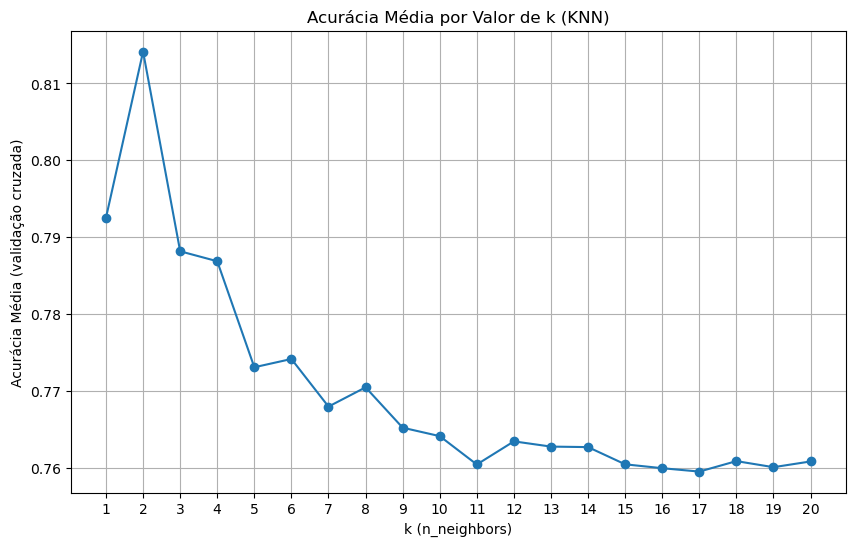

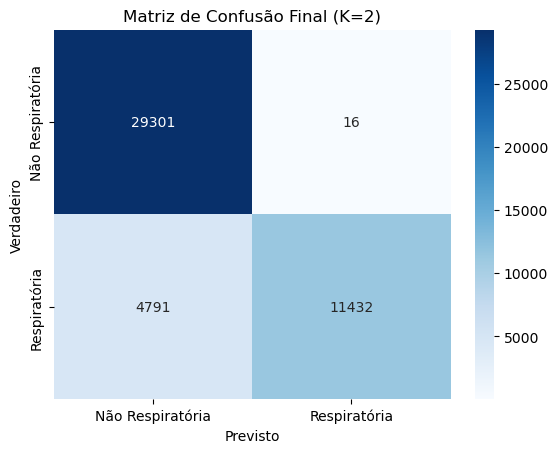


Relatório de Classificação:
                  precision    recall  f1-score   support

Não Respiratória       0.86      1.00      0.92     29317
    Respiratória       1.00      0.70      0.83     16223

        accuracy                           0.89     45540
       macro avg       0.93      0.85      0.88     45540
    weighted avg       0.91      0.89      0.89     45540



In [15]:
#4.3.2. d)
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# === FEATURES E ALVO ===
features = ['Air_Pollution_Average[ug/m3]', 'Affected_Population', 'Populated_Area[km2]', 'Value']
X = df[features]
y = df['RespDisease']

# === NORMALIZAÇÃO ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === VALORES DE K A TESTAR ===
k_values = list(range(1, 21))
best_k = None
best_accuracy = 0
accuracies = []

# === K-FOLD CROSS-VALIDATION ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === TESTAR CADA VALOR DE K ===
for k in k_values:
    fold_accuracies = []

    for train_idx, test_idx in cv.split(X_scaled, y):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        fold_accuracies.append(acc)

    mean_acc = np.mean(fold_accuracies)
    accuracies.append(mean_acc)

    print(f"k={k}: Mean Accuracy = {mean_acc:.4f}")

    if mean_acc > best_accuracy:
        best_accuracy = mean_acc
        best_k = k

# === RESULTADOS ===
print(f"\nMelhor k encontrado: {best_k}")
print(f"Acurácia média com k={best_k}: {best_accuracy:.4f}")

# === GRÁFICO DE ACURÁCIA POR K ===
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Acurácia Média por Valor de k (KNN)")
plt.xlabel("k (n_neighbors)")
plt.ylabel("Acurácia Média (validação cruzada)")
plt.grid(True)
plt.xticks(k_values)
plt.show()

# === TREINO FINAL E AVALIAÇÃO COM O MELHOR K ===
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_scaled, y)
y_pred = best_model.predict(X_scaled)

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Respiratória', 'Respiratória'],
            yticklabels=['Não Respiratória', 'Respiratória'])
plt.title(f"Matriz de Confusão Final (K={best_k})")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y, y_pred, target_names=['Não Respiratória', 'Respiratória']))


In [19]:
#4.3.3.

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, recall_score, accuracy_score, f1_score

# Função personalizada para Specificity (recall da classe 0)
def specificity_score(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=0)

# Definir scorers personalizados
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score, pos_label=1),  # recall da classe positiva (Respiratória)
    'specificity': make_scorer(specificity_score),
    'f1_respiratory': make_scorer(f1_score, pos_label=1)   # F1 da classe Respiratória
}

# Realizar validação cruzada com múltiplas métricas
cv_results = cross_validate(best_model, X_scaled, y, cv=cv, scoring=scoring)

# Calcular média e desvio padrão de cada métrica
metrics = ['accuracy', 'sensitivity', 'specificity', 'f1_respiratory']
for metric in metrics:
    scores = cv_results[f'test_{metric}']
    mean = np.mean(scores)
    std = np.std(scores)
    print(f"{metric.capitalize():<15} → Média: {mean:.4f} | Desvio Padrão: {std:.4f}")

Accuracy        → Média: 0.8141 | Desvio Padrão: 0.0066
Sensitivity     → Média: 0.5125 | Desvio Padrão: 0.0169
Specificity     → Média: 0.9810 | Desvio Padrão: 0.0022
F1_respiratory  → Média: 0.6625 | Desvio Padrão: 0.0152


In [37]:
from scipy.stats import wilcoxon
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier

# Pipeline com SVM escalado
svm_pipeline = make_pipeline(StandardScaler(), best_svm)

# Criar e treinar o modelo final
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_scaled, y)

# Avaliar os modelos com F1-score da classe positiva (RespDisease = 1)
f1_knn = cross_val_score(best_knn, X_scaled, y, cv=5, scoring=make_scorer(f1_score, pos_label=1), n_jobs=-1)
f1_svm = cross_val_score(svm_pipeline, X_scaled, y, cv=5, scoring=make_scorer(f1_score, pos_label=1), n_jobs=-1)

# Wilcoxon
stat, p_value = wilcoxon(f1_knn, f1_svm)

print("Wilcoxon test:")
print(f"Estatística: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Veredito
if p_value < 0.05:
    print("\n➡️ Diferença significativa entre os modelos (p < 0.05)")
    if np.mean(f1_knn) > np.mean(f1_svm):
        print("✅ KNN tem melhor desempenho.")
    else:
        print("✅ SVM tem melhor desempenho.")
else:
    print("\n⚠️ Não há diferença significativa entre os modelos.")


Wilcoxon test:
Estatística: 3.0000
p-valor: 0.3125

⚠️ Não há diferença significativa entre os modelos.
